# Glândula Mamária Bubalina
O presente notebook faz um estudo sobre a dectecção de infecção em glândula mamária bubalina a partir de exames do leite.

### Atributos
CCS - Contagem de Células Somáticas do leite (mil células/mL)

SO - Teste Somaticell (mil celulas/mL)

CMT - California Mastitis Test (escore)

CEL - Condutividade Elétrica do Leite (miliSiems/cm)

ECS - Log de CCS

ESD - Log de SO

ISOL - Tipo da presença dos microrganismos (Ne: Negativa; I: individual - isolamento de apenas um microrganismo; e M: mista - isolameto de 2 ou 3 microrganismo)

TINFc - Característica da infecção (0: Negativa; 1: contagiosa; 2: ambiental; 4: contagiosa + ambiental; e 5: oportunista)

QM - Posição do quarto mamário (AE: Anterior esquerdo; AD: anterior direito; PE: posterior esquerdo; e PD: posterior direito)

QMc - Posição do quarto mamário codificada para duas posições (1: anterior; e 2: posterior)

QMc2 - Posição do quarto mamário codificada para quatro posições (1: AD; 2: AE; 3: PE; e 4: PD)

TINF (Agente 1) - Diferentes microrganismos isolados

TINF (Agente 2) - Diferentes microrganismos isolados

TINF (Agente 3) - Diferentes microrganismos isolados

### Classe
IMM - Microbiologia (D: Doente; e S: Sadio)

#### Organização do notebook

<ol>
    <li>Bibliotecas</li>
    <li>Limpeza e Transformação dos Dados</li>
    <li>Análise dos Dados</li>
    <li>Predição</li>
</ol>


# 1 - Bibliotecas

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# 2 - Limpeza e Transformação dos Dados

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/diegosilveiracn/glandula_mamaria_bubalina/master/dados.csv')

In [12]:
df.head(3)

,Amostra,CCS,SO,CMT,CEL,IMM,ECS,ESO,SOc,ISOL,TINFc,QM,QMc,QMc2,TINF - Agente 1,TINF - Agente 2,TINF - Agente 3
0,9,21.0,79.0,2,4.23,D,3.0439,3.0630,1,I,3,AD,1,1,Bacillus licheniformis,NaN,NaN
1,12,249.0,127.0,2,3.21,D,3.0796,3.0699,1,M,3,AE,1,2,Staphylococcus chromogenes,Klebsiella spp,NaN
2,13,47.0,147.0,4,4.65,D,3.0555,3.0720,3,M,4,PE,2,4,Streptococcus uberis,Klebsiella spp,Bacillus licheniformis


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Amostra          275 non-null    object 
 1    CCS             275 non-null    float64
 2    SO              275 non-null    float64
 3   CMT              275 non-null    int64  
 4   CEL              275 non-null    float64
 5   IMM              275 non-null    object 
 6    ECS             275 non-null    float64
 7    ESO             275 non-null    float64
 8    SOc             275 non-null    int64  
 9   ISOL             275 non-null    object 
 10  TINFc            275 non-null    int64  
 11  QM               275 non-null    object 
 12  QMc              275 non-null    int64  
 13  QMc2             275 non-null    int64  
 14  TINF - Agente 1  189 non-null    object 
 15  TINF - Agente 2  50 non-null     object 
 16  TINF - Agente 3  6 non-null      object 
dtypes: float64(5), i

### Amostra

In [0]:
df.drop('Amostra',axis=1,inplace=True)

In [15]:
df.head(3)

,CCS,SO,CMT,CEL,IMM,ECS,ESO,SOc,ISOL,TINFc,QM,QMc,QMc2,TINF - Agente 1,TINF - Agente 2,TINF - Agente 3
0,21.0,79.0,2,4.23,D,3.0439,3.0630,1,I,3,AD,1,1,Bacillus licheniformis,NaN,NaN
1,249.0,127.0,2,3.21,D,3.0796,3.0699,1,M,3,AE,1,2,Staphylococcus chromogenes,Klebsiella spp,NaN
2,47.0,147.0,4,4.65,D,3.0555,3.0720,3,M,4,PE,2,4,Streptococcus uberis,Klebsiella spp,Bacillus licheniformis


### IMM

In [0]:
lista_imm = df['IMM'].unique()

In [17]:
lista_imm

array(['D', 'S'], dtype=object)

In [0]:
map_imm = {lista_imm[x]: x for x in range(len(lista_imm))}

In [19]:
map_imm

{'D': 0, 'S': 1}

In [0]:
df['IMM'] = df['IMM'].map(map_imm)

In [21]:
df.head(3)

,CCS,SO,CMT,CEL,IMM,ECS,ESO,SOc,ISOL,TINFc,QM,QMc,QMc2,TINF - Agente 1,TINF - Agente 2,TINF - Agente 3
0,21.0,79.0,2,4.23,0,3.0439,3.0630,1,I,3,AD,1,1,Bacillus licheniformis,NaN,NaN
1,249.0,127.0,2,3.21,0,3.0796,3.0699,1,M,3,AE,1,2,Staphylococcus chromogenes,Klebsiella spp,NaN
2,47.0,147.0,4,4.65,0,3.0555,3.0720,3,M,4,PE,2,4,Streptococcus uberis,Klebsiella spp,Bacillus licheniformis


### ISOL

In [0]:
lista_isol = df['ISOL'].unique()

In [23]:
lista_isol

array(['I', 'M', 'Ne'], dtype=object)

In [0]:
map_isol = {lista_isol[x]: x for x in range(len(lista_isol))}

In [25]:
map_isol

{'I': 0, 'M': 1, 'Ne': 2}

In [0]:
df['ISOL'] = df['ISOL'].map(map_isol)

In [27]:
df.head(3)

,CCS,SO,CMT,CEL,IMM,ECS,ESO,SOc,ISOL,TINFc,QM,QMc,QMc2,TINF - Agente 1,TINF - Agente 2,TINF - Agente 3
0,21.0,79.0,2,4.23,0,3.0439,3.0630,1,0,3,AD,1,1,Bacillus licheniformis,NaN,NaN
1,249.0,127.0,2,3.21,0,3.0796,3.0699,1,1,3,AE,1,2,Staphylococcus chromogenes,Klebsiella spp,NaN
2,47.0,147.0,4,4.65,0,3.0555,3.0720,3,1,4,PE,2,4,Streptococcus uberis,Klebsiella spp,Bacillus licheniformis


### QM

In [0]:
lista_qm = df['QM'].unique()

In [29]:
lista_qm

array(['AD', 'AE', 'PE', 'PD', 'COMP'], dtype=object)

In [0]:
map_qm = {lista_qm[x]: x for x in range(len(lista_qm))}

In [31]:
map_qm

{'AD': 0, 'AE': 1, 'COMP': 4, 'PD': 3, 'PE': 2}

In [0]:
df['QM'] = df['QM'].map(map_qm)

In [33]:
df.head(3)

,CCS,SO,CMT,CEL,IMM,ECS,ESO,SOc,ISOL,TINFc,QM,QMc,QMc2,TINF - Agente 1,TINF - Agente 2,TINF - Agente 3
0,21.0,79.0,2,4.23,0,3.0439,3.0630,1,0,3,0,1,1,Bacillus licheniformis,NaN,NaN
1,249.0,127.0,2,3.21,0,3.0796,3.0699,1,1,3,1,1,2,Staphylococcus chromogenes,Klebsiella spp,NaN
2,47.0,147.0,4,4.65,0,3.0555,3.0720,3,1,4,2,2,4,Streptococcus uberis,Klebsiella spp,Bacillus licheniformis


### TINF - Agente 1

In [0]:
df['TINF - Agente 1'] = df.apply(lambda x: 0 if pd.isna(x['TINF - Agente 1']) else 1,axis=1)

In [35]:
df.head(3)

,CCS,SO,CMT,CEL,IMM,ECS,ESO,SOc,ISOL,TINFc,QM,QMc,QMc2,TINF - Agente 1,TINF - Agente 2,TINF - Agente 3
0,21.0,79.0,2,4.23,0,3.0439,3.0630,1,0,3,0,1,1,1,NaN,NaN
1,249.0,127.0,2,3.21,0,3.0796,3.0699,1,1,3,1,1,2,1,Klebsiella spp,NaN
2,47.0,147.0,4,4.65,0,3.0555,3.0720,3,1,4,2,2,4,1,Klebsiella spp,Bacillus licheniformis


### TINF - Agente 2

In [0]:
df['TINF - Agente 2'] = df.apply(lambda x: 0 if pd.isna(x['TINF - Agente 2']) else 1,axis=1)

In [37]:
df.head(3)

,CCS,SO,CMT,CEL,IMM,ECS,ESO,SOc,ISOL,TINFc,QM,QMc,QMc2,TINF - Agente 1,TINF - Agente 2,TINF - Agente 3
0,21.0,79.0,2,4.23,0,3.0439,3.0630,1,0,3,0,1,1,1,0,NaN
1,249.0,127.0,2,3.21,0,3.0796,3.0699,1,1,3,1,1,2,1,1,NaN
2,47.0,147.0,4,4.65,0,3.0555,3.0720,3,1,4,2,2,4,1,1,Bacillus licheniformis


### TINF - Agente 3

In [0]:
df['TINF - Agente 3'] = df.apply(lambda x: 0 if pd.isna(x['TINF - Agente 3']) else 1,axis=1)

In [39]:
df.head(3)

,CCS,SO,CMT,CEL,IMM,ECS,ESO,SOc,ISOL,TINFc,QM,QMc,QMc2,TINF - Agente 1,TINF - Agente 2,TINF - Agente 3
0,21.0,79.0,2,4.23,0,3.0439,3.0630,1,0,3,0,1,1,1,0,0
1,249.0,127.0,2,3.21,0,3.0796,3.0699,1,1,3,1,1,2,1,1,0
2,47.0,147.0,4,4.65,0,3.0555,3.0720,3,1,4,2,2,4,1,1,1


# 3 - Análise dos Dados

In [40]:
df.describe()

,CCS,SO,CMT,CEL,IMM,ECS,ESO,SOc,ISOL,TINFc,QM,QMc,QMc2,TINF - Agente 1,TINF - Agente 2,TINF - Agente 3
count,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,1018.600000,638.185455,1.796364,4.700182,0.312727,3.082453,3.085696,2.207273,0.807273,2.330909,1.825455,1.614545,2.800000,0.687273,0.181818,0.021818
std,1868.834472,611.304324,1.430375,1.198817,0.464449,0.023792,0.015585,0.886199,0.885375,1.299758,1.045710,0.487590,1.035854,0.464449,0.386398,0.146356
min,6.000000,69.000000,0.000000,2.890000,0.000000,3.025800,3.061100,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,94.500000,127.000000,0.000000,3.860000,0.000000,3.065600,3.069900,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000
50%,320.000000,418.000000,2.000000,4.340000,0.000000,3.083200,3.087100,3.000000,0.000000,2.000000,2.000000,2.000000,3.000000,1.000000,0.000000,0.000000
75%,926.500000,960.000000,3.000000,5.275000,1.000000,3.098550,3.099100,3.000000,2.000000,3.000000,3.000000,2.000000,4.000000,1.000000,0.000000,0.000000
max,9999.000000,1970.000000,4.000000,9.720000,1.000000,3.132900,3.109400,3.000000,2.000000,5.000000,4.000000,2.000000,4.000000,1.000000,1.000000,1.000000


[[Text(0, 0, 'Doente'), Text(0, 0, 'Sadio')]]

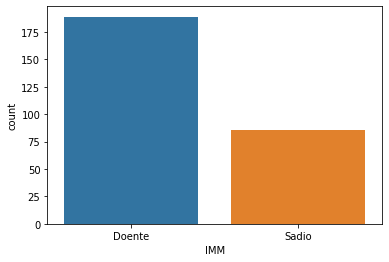

In [41]:
g = sns.countplot(x='IMM',data=df)
g.set(xticklabels=['Doente','Sadio'])

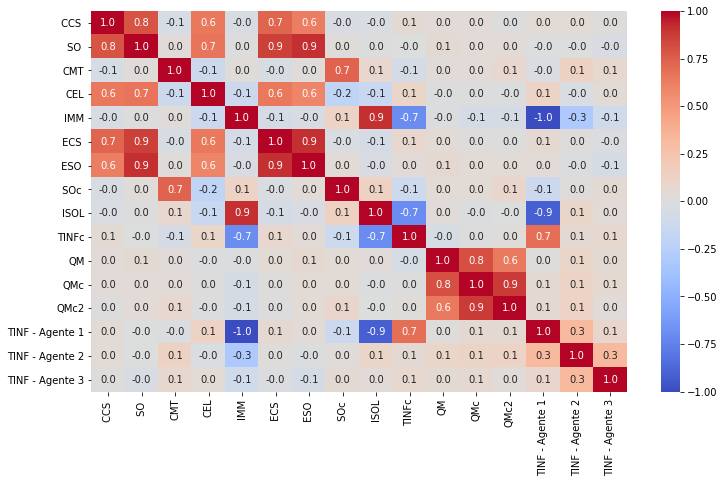

In [42]:
fig,ax = plt.subplots(figsize=(12,7))
g = sns.heatmap(df.corr(),annot=True,fmt=".1f",cmap="coolwarm",ax=ax)

# 4 - Predição

In [0]:
list_colunas = df.columns.drop('IMM')

In [44]:
list_colunas

Index([' CCS ', ' SO ', 'CMT', 'CEL', ' ECS ', ' ESO ', ' SOc ', 'ISOL',
       'TINFc', 'QM', 'QMc', 'QMc2', 'TINF - Agente 1', 'TINF - Agente 2',
       'TINF - Agente 3'],
      dtype='object')

In [0]:
x = df.loc[:,list_colunas]

In [46]:
x.head(3)

,CCS,SO,CMT,CEL,ECS,ESO,SOc,ISOL,TINFc,QM,QMc,QMc2,TINF - Agente 1,TINF - Agente 2,TINF - Agente 3
0,21.0,79.0,2,4.23,3.0439,3.0630,1,0,3,0,1,1,1,0,0
1,249.0,127.0,2,3.21,3.0796,3.0699,1,1,3,1,1,2,1,1,0
2,47.0,147.0,4,4.65,3.0555,3.0720,3,1,4,2,2,4,1,1,1


In [0]:
y = df['IMM']

In [48]:
y.head(3)

0    0
1    0
2    0
Name: IMM, dtype: int64

### Support Vector Classifier

In [0]:
svc_clf = SVC(kernel='poly',gamma='scale')

In [0]:
svc_scores = cross_val_score(svc_clf, x, y, cv=10)

In [51]:
'Acuidade = %0.4f (+/- %0.4f)' % (svc_scores.mean(),svc_scores.std() * 2)

'Acuidade = 0.6874 (+/- 0.0274)'

### k-Nearest Neighbors Classifier

In [0]:
knn_clf = KNeighborsClassifier(n_neighbors=5)

In [0]:
knn_scores = cross_val_score(knn_clf,x,y,cv=10)

In [54]:
'Acuidade = %0.4f (+/- %0.4f)' % (knn_scores.mean(),knn_scores.std() * 2)

'Acuidade = 0.6552 (+/- 0.1672)'

### Gaussian Naive Bayes Classifier

In [0]:
nb_clf = GaussianNB()

In [0]:
nb_scores = cross_val_score(nb_clf,x,y,cv=10)

In [57]:
'Acuidade = %0.4f (+/- %0.4f)' % (nb_scores.mean(),nb_scores.std() * 2)

'Acuidade = 1.0000 (+/- 0.0000)'

### Multi-layer Perceptron Classifier

In [0]:
mlp_clf = MLPClassifier()

In [0]:
mlp_scores = cross_val_score(mlp_clf,x,y,cv=10)

In [60]:
'Acuidade = %0.4f (+/- %0.4f)' % (mlp_scores.mean(),mlp_scores.std() * 2)

'Acuidade = 0.6821 (+/- 0.3443)'

### Decision Tree Classifier

In [0]:
dt_clf = DecisionTreeClassifier()

In [0]:
dt_scores = cross_val_score(dt_clf,x,y,cv=10)

In [63]:
'Acuidade = %0.4f (+/- %0.4f)' % (dt_scores.mean(),dt_scores.std() * 2)

'Acuidade = 1.0000 (+/- 0.0000)'